### Imports & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import scipy
from scipy import stats
from scipy.stats import skew 
from scipy.stats import kurtosis 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
red_wine_no_out = pd.read_csv(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\red_wine_no_out.csv", sep=',')

### Anova

### Skewness & Kurtosis


In [3]:
red_wine_no_out.skew()

fixed_acidity           0.868922
volatile_acidity        0.247503
citric_acid             0.322200
residual_sugar          1.378345
chlorides               0.158740
free_sulfur_dioxide     0.781377
total_sulfur_dioxide    1.211594
density                -0.106028
pH                      0.054962
sulphates               0.651613
alcohol                 0.864020
quality                 0.418557
quality_label           0.026744
type                    0.000000
dtype: float64

In [4]:
red_wine_no_out.kurt()

fixed_acidity           0.538548
volatile_acidity       -0.326829
citric_acid            -0.829004
residual_sugar          7.425378
chlorides               0.313187
free_sulfur_dioxide    -0.101528
total_sulfur_dioxide    1.159763
density                 0.140834
pH                     -0.170747
sulphates               0.153152
alcohol                 0.142479
quality                 0.203208
quality_label          -1.285550
type                    0.000000
dtype: float64

### Split Data


In [5]:
red_wine_no_out1 = red_wine_no_out.drop('quality', axis=1)

In [6]:
# Split data into X and Y
X = red_wine_no_out1.drop('quality_label', axis=1)
y = red_wine_no_out1['quality_label']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Feature Scaling (left out)

Accuracy: 0.7792
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       105
           1       0.80      0.78      0.79       121
           2       0.00      0.00      0.00         5

    accuracy                           0.78       231
   macro avg       0.52      0.53      0.53       231
weighted avg       0.76      0.78      0.77       231



c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


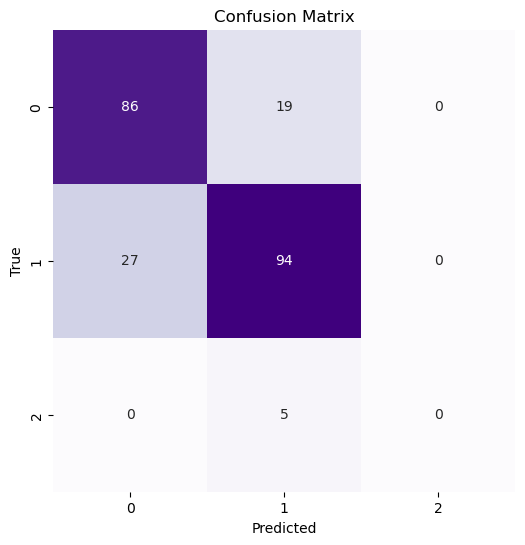

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Z-score normalization
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=453)

# Fit model on the normalized training data
RF_clf.fit(x_train_scaled, y_train)

# Make predictions on the normalized test data
preds = RF_clf.predict(x_test_scaled)

# Calculate accuracy
acc = accuracy_score(y_test, preds)
print(f'Accuracy: {acc:.4f}')

from sklearn.metrics import classification_report
print (classification_report(y_test, preds))

# Confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       105
           1       0.80      0.71      0.75       121
           2       0.00      0.00      0.00         5

    accuracy                           0.76       231
   macro avg       0.52      0.52      0.52       231
weighted avg       0.76      0.76      0.76       231



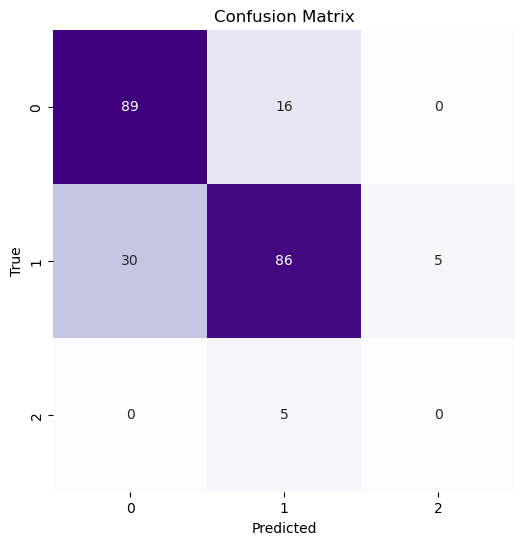

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Z-score normalization
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

# Random Forest Classifier
RF_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=453, class_weight='balanced')
RF_clf.fit(x_train_scaled, y_train_resampled)

# Predictions and performance evaluation
preds = RF_clf.predict(x_test_scaled)

# Print classification report
print(classification_report(y_test, preds))

# Confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Best parameters found by GridSearchCV: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       0.99      1.00      1.00       121
           2       1.00      0.80      0.89         5

    accuracy                           1.00       231
   macro avg       1.00      0.93      0.96       231
weighted avg       1.00      1.00      1.00       231



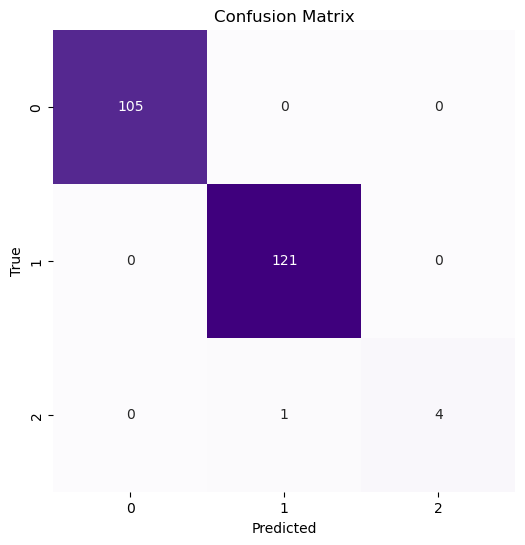

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming all_wine_cleaned3 is your dataset
# Split data into X and Y
X = red_wine_no_out.drop('quality_label', axis=1)
y = red_wine_no_out['quality_label']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Z-score normalization
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],           # Number of trees
    'max_depth': [10, 20, None],               # Maximum depth of trees
    'min_samples_split': [2, 10, 20],          # Minimum samples to split a node
    'min_samples_leaf': [1, 5, 10],            # Minimum samples at a leaf node
    'class_weight': ['balanced', {0: 1, 1: 1, 2: 5}]  # Class weights for balancing
}

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(criterion='entropy', random_state=453)

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model with the resampled training data
grid_search.fit(x_train_scaled, y_train_resampled)

# Get the best model
best_rf = grid_search.best_estimator_
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")

# Make predictions on the test data
preds = best_rf.predict(x_test_scaled)

# Print classification report
print(classification_report(y_test, preds))

# Confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Prediction

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=453)

# fit model
RF_clf.fit(x_train, y_train)

# predictions
preds = RF_clf.predict(x_test)

# accuracy
acc = accuracy_score(y_test, preds)
print(acc)

0.7792207792207793


In [8]:
from sklearn.metrics import classification_report
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       105
           1       0.80      0.78      0.79       121
           2       0.00      0.00      0.00         5

    accuracy                           0.78       231
   macro avg       0.52      0.53      0.53       231
weighted avg       0.76      0.78      0.77       231



c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[86, 19,  0],
       [27, 94,  0],
       [ 0,  5,  0]], dtype=int64)

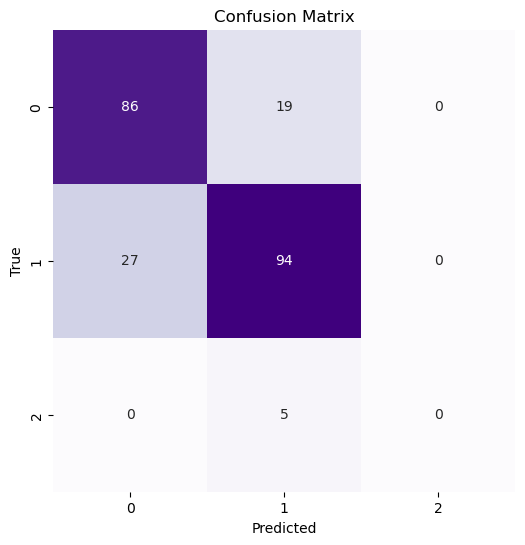

In [10]:
cm = confusion_matrix(y_test, preds)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()